In [1]:
## This version excludes CONTINUOUS Variables and the RFD variables AND _wHICH VARIABLES 3/27/2024 and con_max_consultorder_time/day and drg name
## 4/4/2024 Added QUINTILE variables
## 4/8/2024 Added QUINTILE varables by service
## 4/9/2024 Added more consult and imaging variables (e.g. ad,it order to consult order, admit order to imaging read)
## 4/11/2024 Added QUINTILE variables by service for the additional variables
# 06/12/2024: Added gender, added imaging_order_before_consult_order and consult_order_before_imaging order variables, excluded 290 patients in 2022, dropped raw race/insurance categories
# 06/14/2024: Removed quintiles
# 06/20/2024: Set seed for reproducibility
# 06/22/2024: Added sample size for validation
# 07/05/2024: Collapsed Cardiology into Medicine
# 07/08/2024: Added labels
# 07/25/2024: Removed duplicated patients from master file
# 08/01/2024: Changed XGBoost hyperparmeter tuning to Haipeng's code and using only one model, streamlined so all shap plots in one jupyter notebook

In [2]:
import pandas as pd
import numpy as np
import os
import warnings
from los_functions import *
warnings.filterwarnings('ignore')

In [3]:
#all hospitalized patients 
df_all = pd.read_csv('/gpfs/milgram/project/rtaylor/imc33/LOS/data/master_los.csv', index_col=[0])
df_all["viz_service_collapsed"] = df_all["viz_service_collapsed"].apply(map_med)

#discharged home
df_home = df_all[df_all["viz_disp_collapsed"] == "Home"].copy()

#hf patients
df_all = pd.read_csv('/gpfs/milgram/project/rtaylor/imc33/LOS/data/master_los.csv', index_col=[0])
df_hf = df_all[df_all["viz_drg"]=="heart failure & shock w mcc"].copy()

In [4]:
# Dictionary of data frames with their names
dfs = {
    "df_all": df_all,
    "df_home": df_home,
    "df_hf":df_hf
}

fp_simple = '/gpfs/milgram/project/rtaylor/imc33/LOS/data/features_los_simple.xlsx'
fp_complex = '/gpfs/milgram/project/rtaylor/imc33/LOS/data/features_los.xlsx'
output_folder = '/gpfs/milgram/project/rtaylor/imc33/LOS/output'

### Simple (without quintiles)

Running on df_all
df_filt shape: (12771, 911)
X train_preprocessed shape: (10246, 289)
X val preprocessed shape: (2525, 289)
y train prolonged LOS proportion: 0.4388053874682803
y val prolonged LOS proportion: 0.4304950495049505
X_train_selected shape: (10246, 213)
X_val_selected shape: (2525, 213)
100%|██████████| 20/20 [00:15<00:00,  1.27trial/s, best loss: -0.7489285056396533]
XGB Best parameters for 213 features: {'colsample_by_tree': 0.6425936901635491, 'learning_rate': 0.13914887471932533, 'max_depth': 14, 'n_estimators': 29, 'num_leaves': 35, 'reg_lambda': 0.8474645439246081}


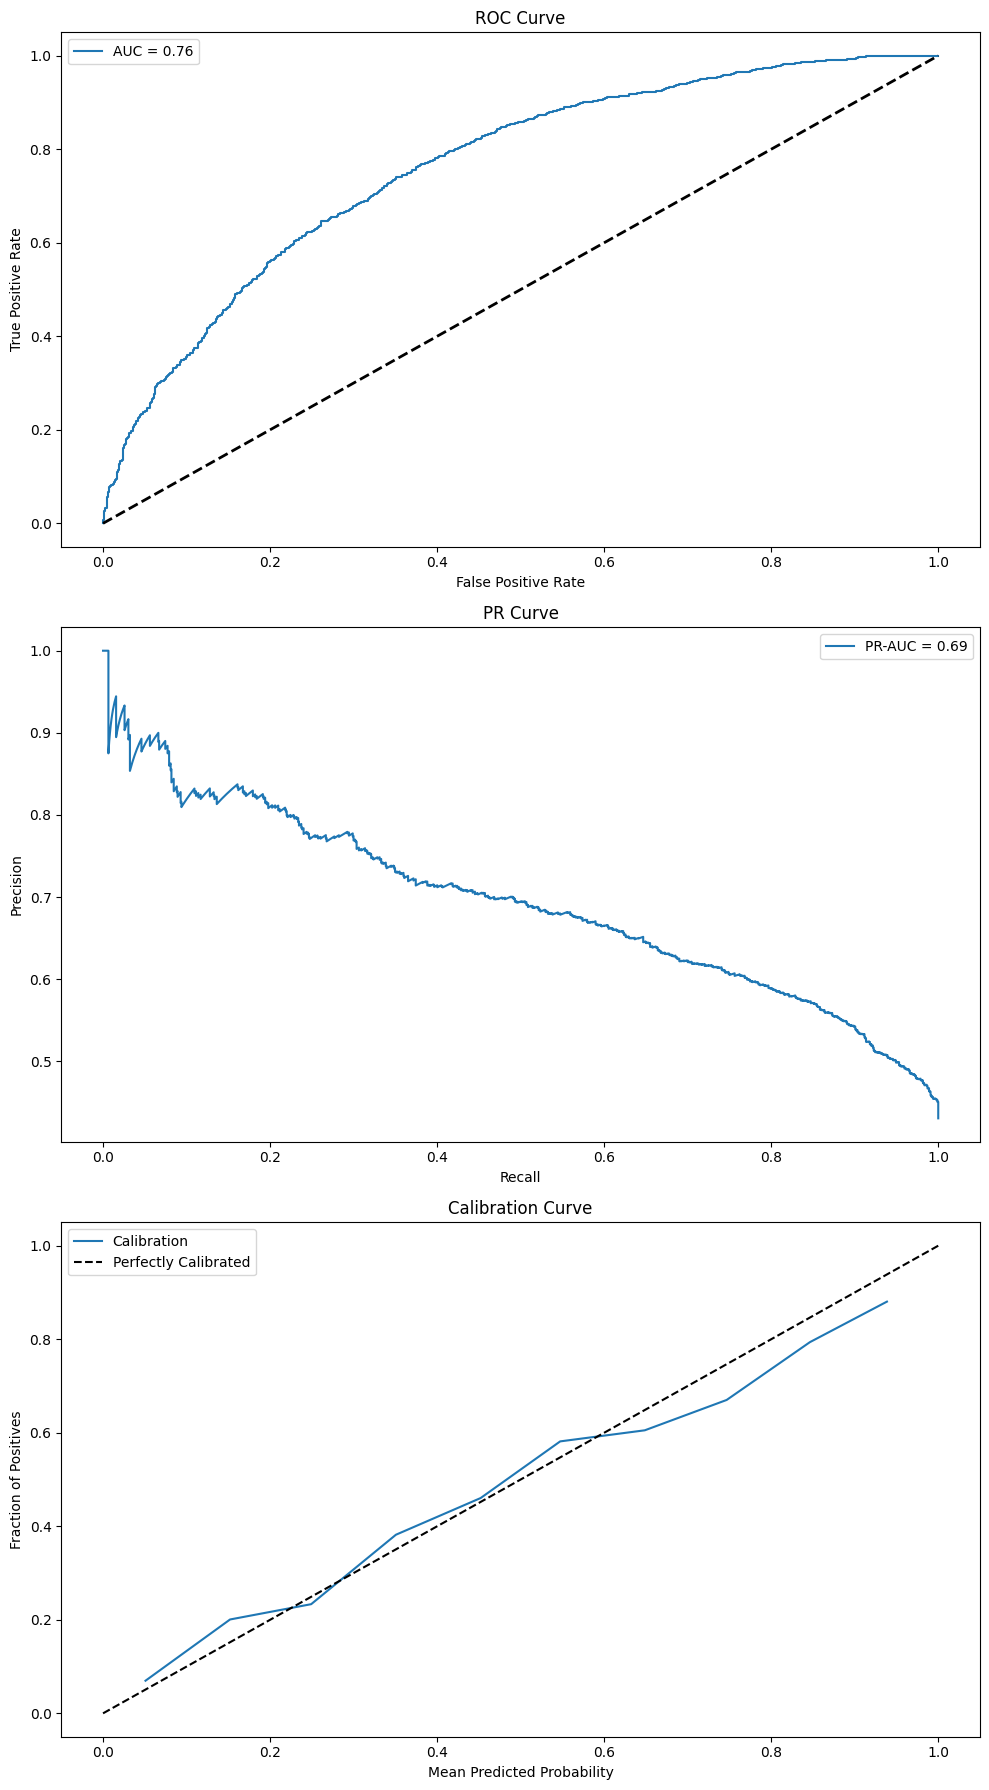

Specificity : 0.7809
Sensitivity : 0.5869
Accuracy : 0.6974
Precision : 0.6695
F1 score : 0.6255
Of 1438 people who did not have a prolonged LOS, 1123 (78.09%) were correctly classified.
Of 1087 people who did have a prolonged LOS, 638 (58.69%) were correctly classified.
summary_consult_count_all
summary_first_rfd_status_No
viz_right_service_collapsed_yn
viz_disp_collapsed_Other
img_count_any
viz_drg_Respiratory infections & inflammations w mcc
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w mcc
census_daily_ed_count
viz_age
census_daily_inpt_count
thro_ed_arrival_time_Afternoon
summary_consult_count_unique_services
summary_last_rfd_status_No
img_count_us
con_service_gastroenterology_count
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w/o mcc
summary_last_edd_doc_time_Morning
summary_first_rfd_day_Mon
con_signer_ym_provider_count
viz_ynhhs_sg2_service_Digestive Health - Medical
con_service_oncology_count
thro_last_bed_assigned_time_Morning
viz_admission_day_Fri
img_count_

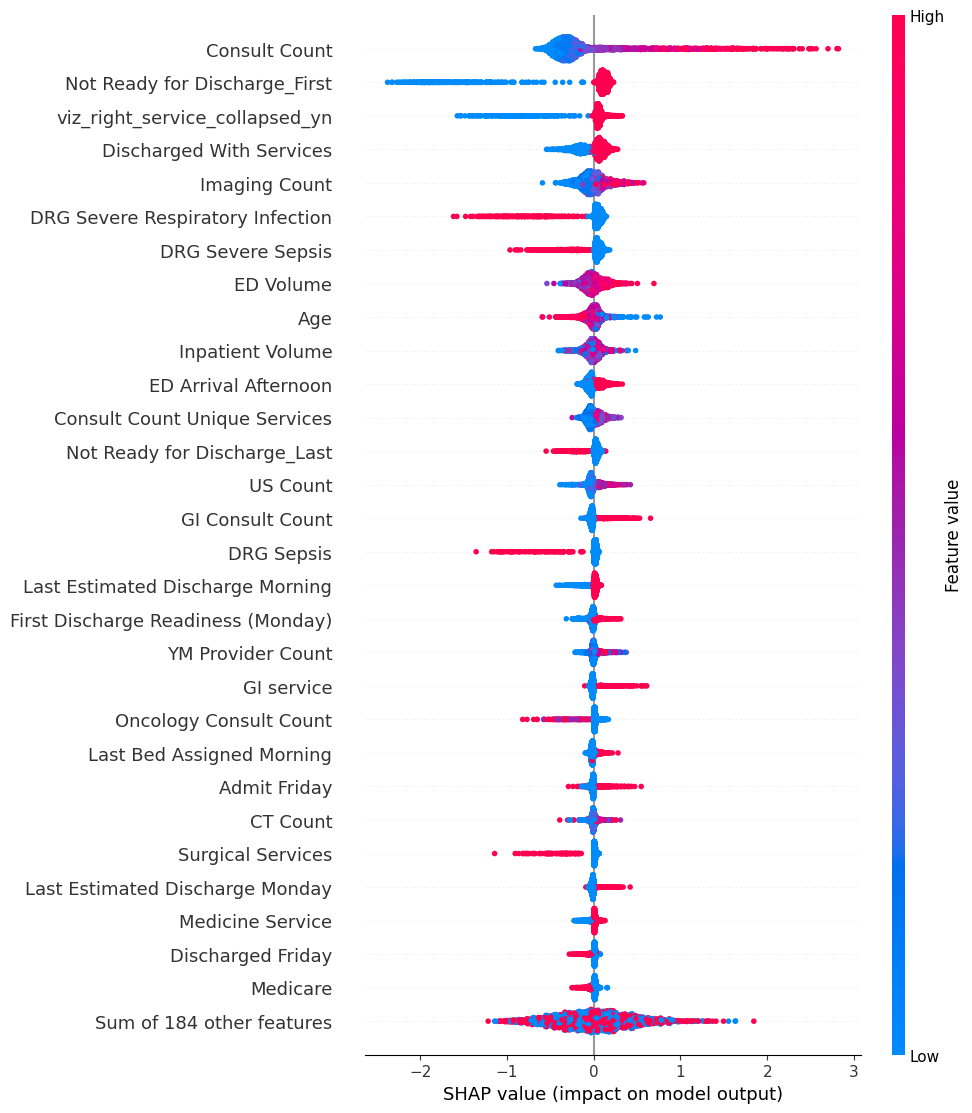

Plots for df_all_simple_2024-08-02 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output
Running on df_home
df_filt shape: (4749, 911)
X train_preprocessed shape: (3814, 285)
X val preprocessed shape: (935, 285)
y train prolonged LOS proportion: 0.3618248557944415
y val prolonged LOS proportion: 0.32192513368983955
X_train_selected shape: (3814, 207)
X_val_selected shape: (935, 207)
100%|██████████| 20/20 [00:09<00:00,  2.03trial/s, best loss: -0.7790269650625208]
XGB Best parameters for 207 features: {'colsample_by_tree': 0.6425936901635491, 'learning_rate': 0.13914887471932533, 'max_depth': 14, 'n_estimators': 29, 'num_leaves': 35, 'reg_lambda': 0.8474645439246081}


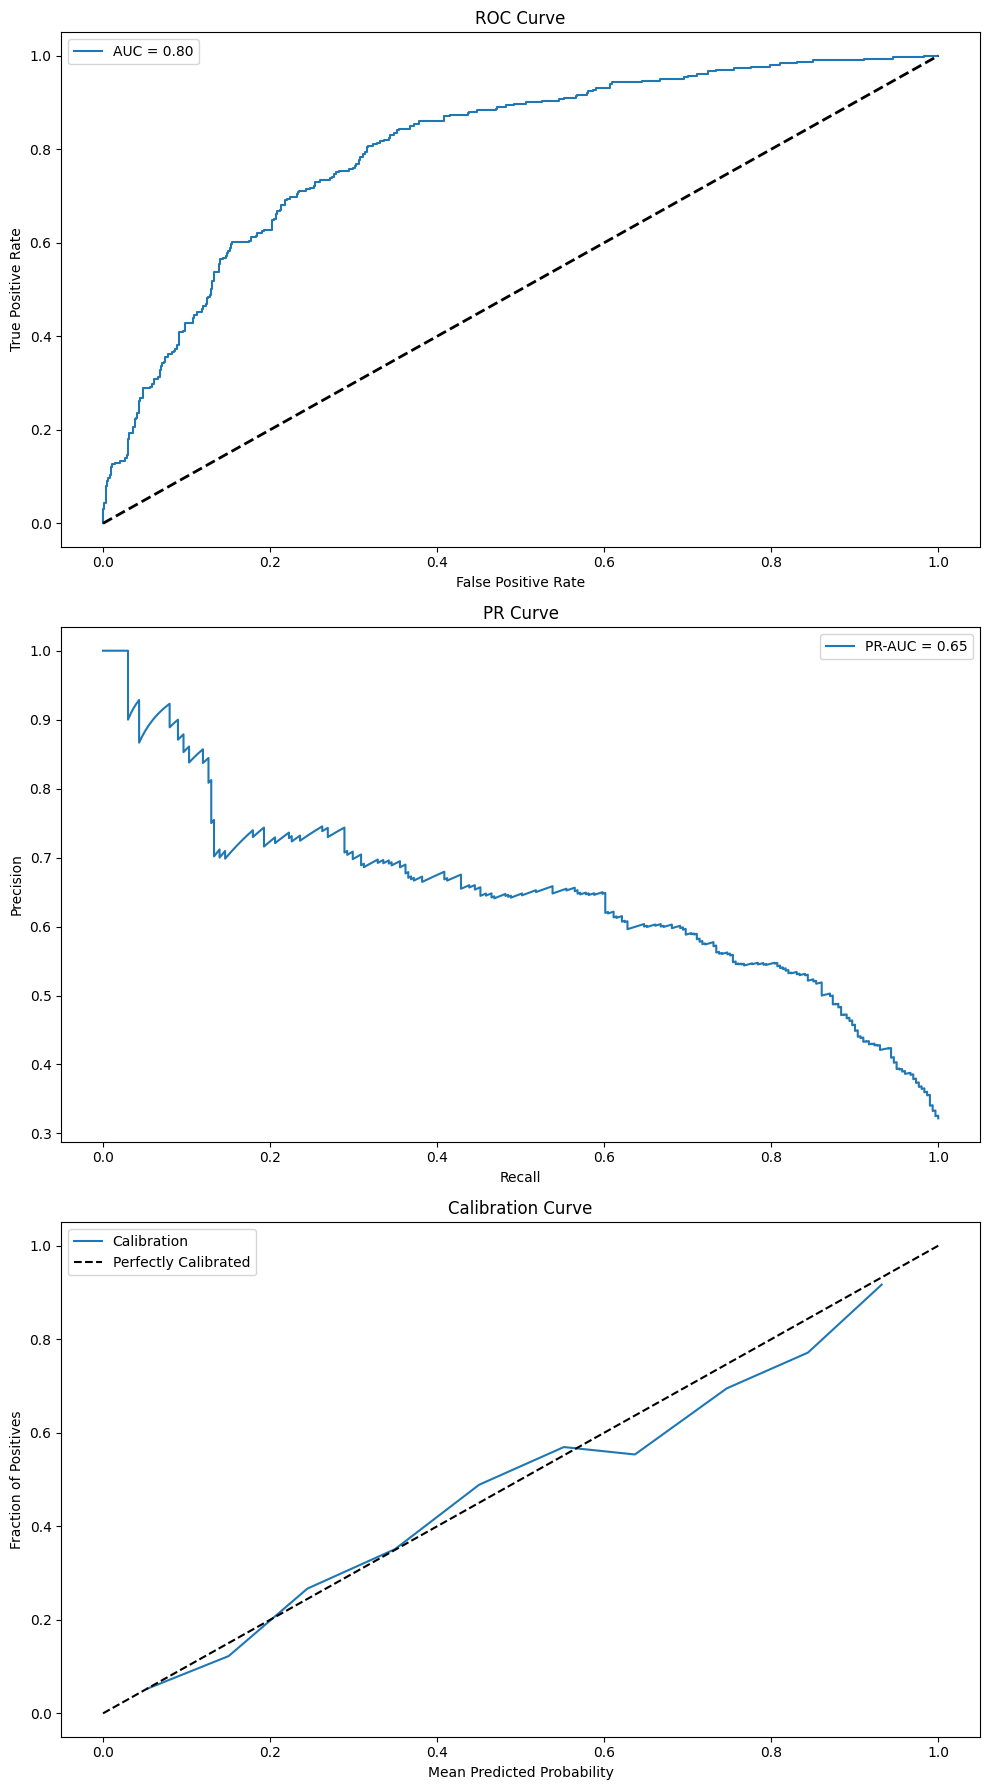

Specificity : 0.8691
Sensitivity : 0.5017
Accuracy : 0.7508
Precision : 0.6453
F1 score : 0.5645
Of 634 people who did not have a prolonged LOS, 551 (86.91%) were correctly classified.
Of 301 people who did have a prolonged LOS, 151 (50.17%) were correctly classified.
summary_first_rfd_status_No
summary_consult_count_all
viz_age
thro_ed_arrival_time_Afternoon
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w mcc
img_count_any
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w/o mcc
census_daily_ed_count
img_count_us
summary_first_edd_doc_day_Mon
census_daily_inpt_count
viz_drg_Respiratory infections & inflammations w mcc
viz_ynhhs_sg2_service_Digestive Health - Medical
summary_last_edd_doc_time_Morning
con_service_radiology_count
summary_last_edd_doc_day_Mon
viz_admission_day_Fri
summary_last_rfd_status_No
viz_discharged_day_Fri
thro_ed_arrival_time_Night
summary_first_rfd_day_Mon
summary_first_edd_doc_day_Thu
viz_admission_day_Thu
viz_discharged_day_Mon
summary_first_rfd_day_

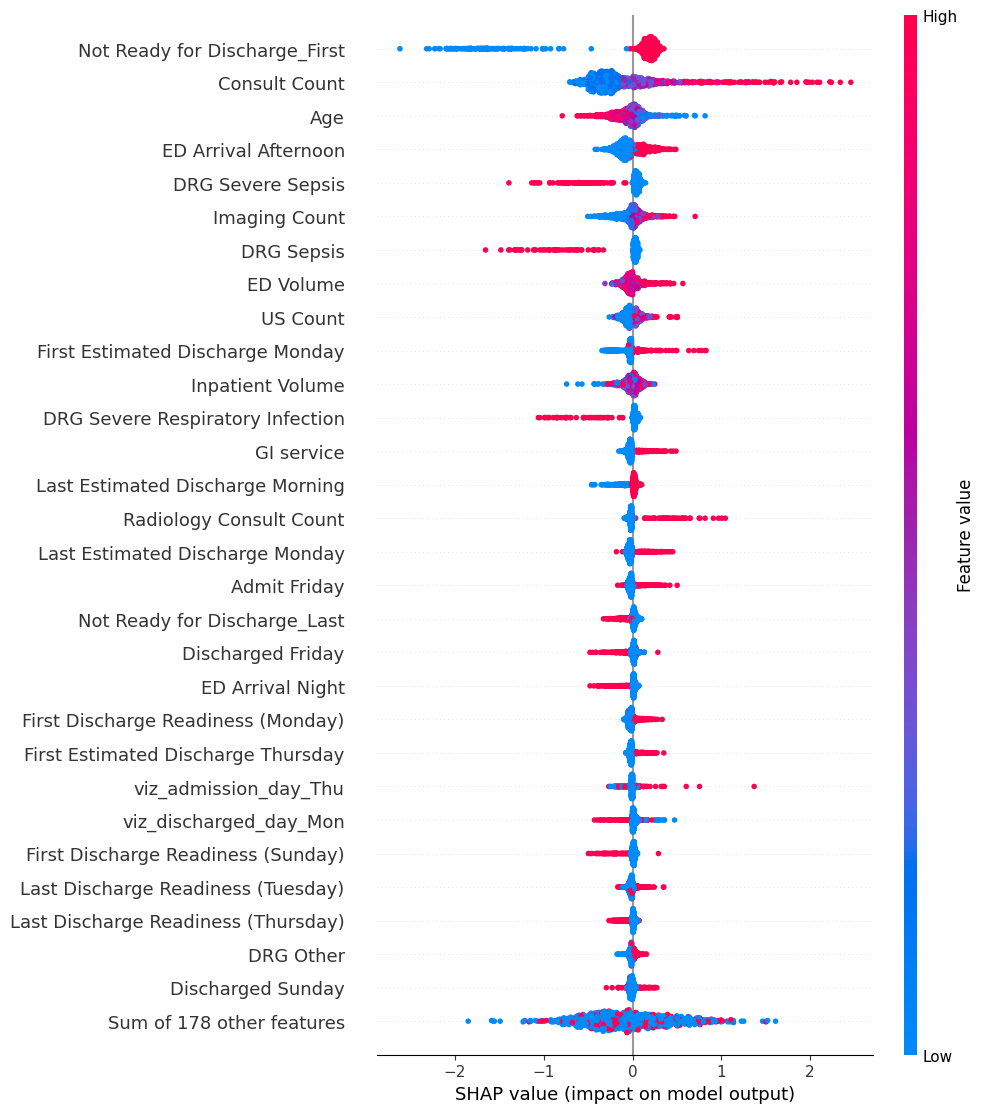

Plots for df_home_simple_2024-08-02 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output
Running on df_hf
df_filt shape: (1351, 911)
X train_preprocessed shape: (1091, 263)
X val preprocessed shape: (260, 263)
y train prolonged LOS proportion: 0.44912923923006415
y val prolonged LOS proportion: 0.4576923076923077
X_train_selected shape: (1091, 176)
X_val_selected shape: (260, 176)
100%|██████████| 20/20 [00:06<00:00,  3.10trial/s, best loss: -0.6899867881036712]
XGB Best parameters for 176 features: {'colsample_by_tree': 0.6565004189886763, 'learning_rate': 0.29938202228220967, 'max_depth': 7, 'n_estimators': 33, 'num_leaves': 47, 'reg_lambda': 0.5464002904734102}


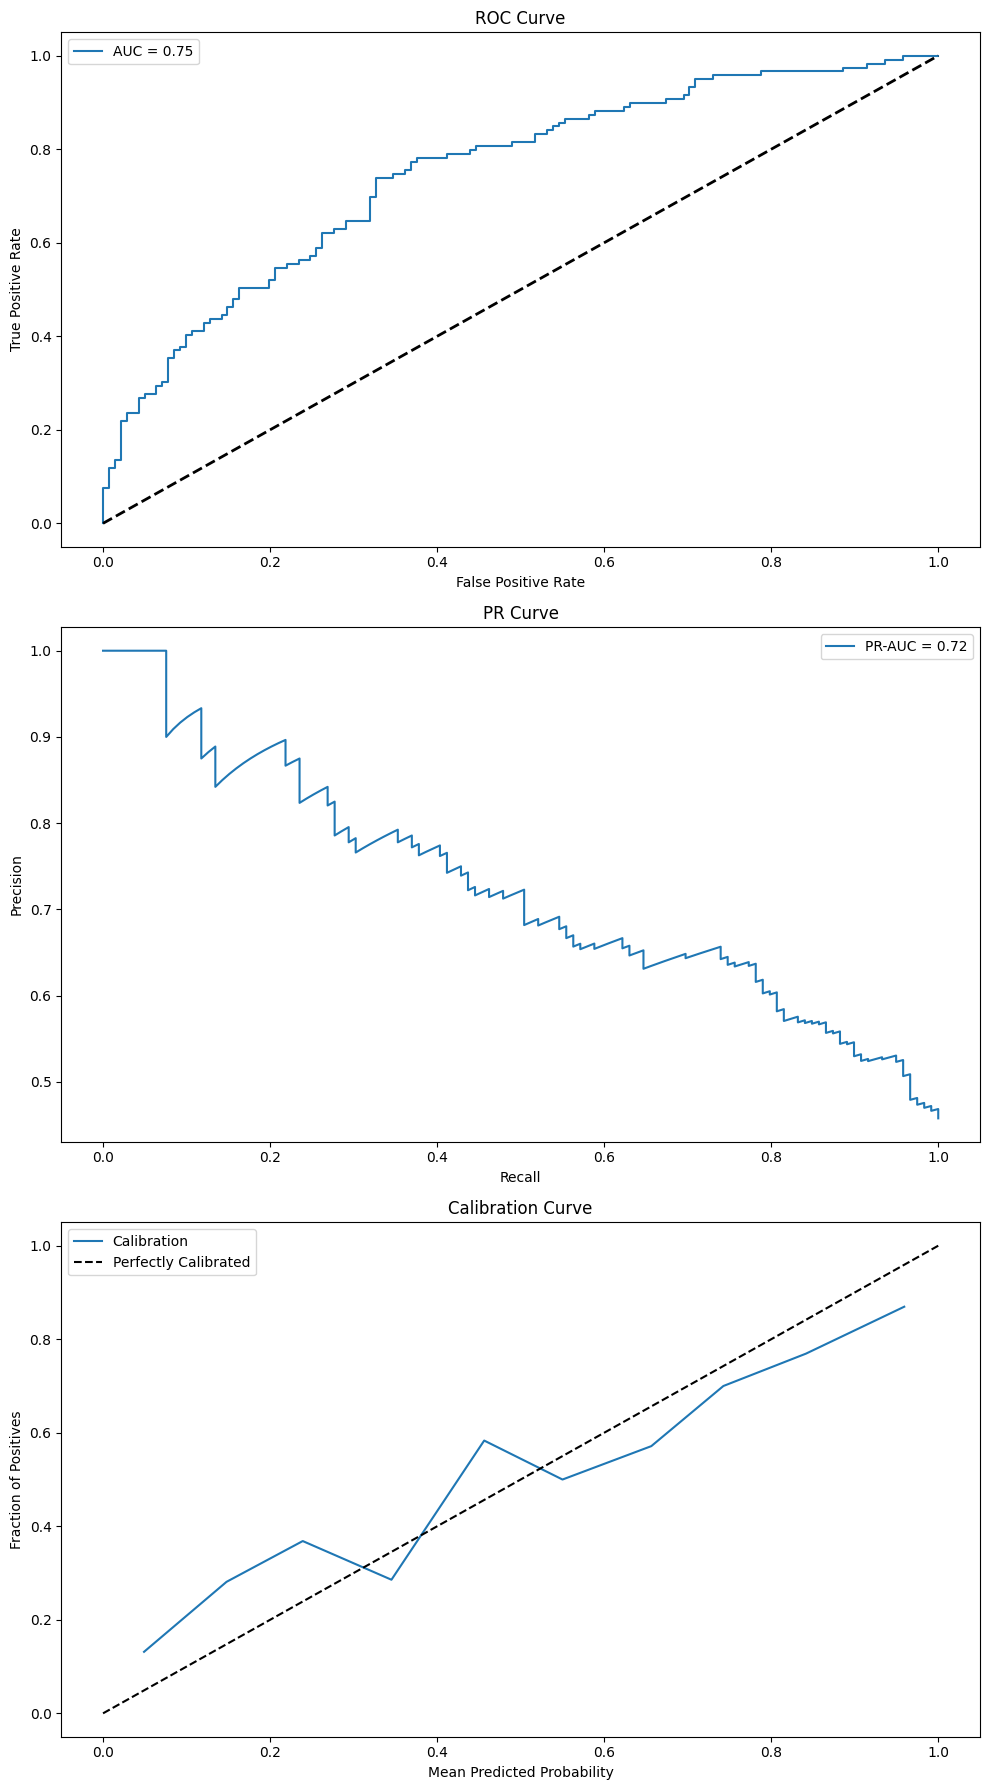

Specificity : 0.7305
Sensitivity : 0.6218
Accuracy : 0.6808
Precision : 0.6607
F1 score : 0.6407
Of 141 people who did not have a prolonged LOS, 103 (73.05%) were correctly classified.
Of 119 people who did have a prolonged LOS, 74 (62.18%) were correctly classified.
img_count_any
summary_first_rfd_status_No
summary_consult_count_all
thro_ed_arrival_time_Afternoon
census_daily_inpt_count
viz_gender_Male
census_daily_ed_count
viz_age
con_signer_ym_provider_count
thro_first_bed_assigned_time_Afternoon
img_count_us
viz_admission_day_Mon
summary_first_rfd_day_Mon
summary_consult_count_unique_services
summary_first_rfd_status_Yes, no barriers
viz_disp_collapsed_Other
summary_last_edd_doc_day_Mon
con_max_consult_note_creation_day_Mon
thro_admit_or_obs_order_day_Sun
summary_first_edd_day_Mon
thro_boarding_yn
thro_first_bed_assigned_time_Night
viz_discharged_day_Tue
summary_last_edd_day_Fri
summary_first_edd_day_Wed
con_max_consult_order_to_sign_is_signer_nemg_provider_yn
con_max_consult_note_

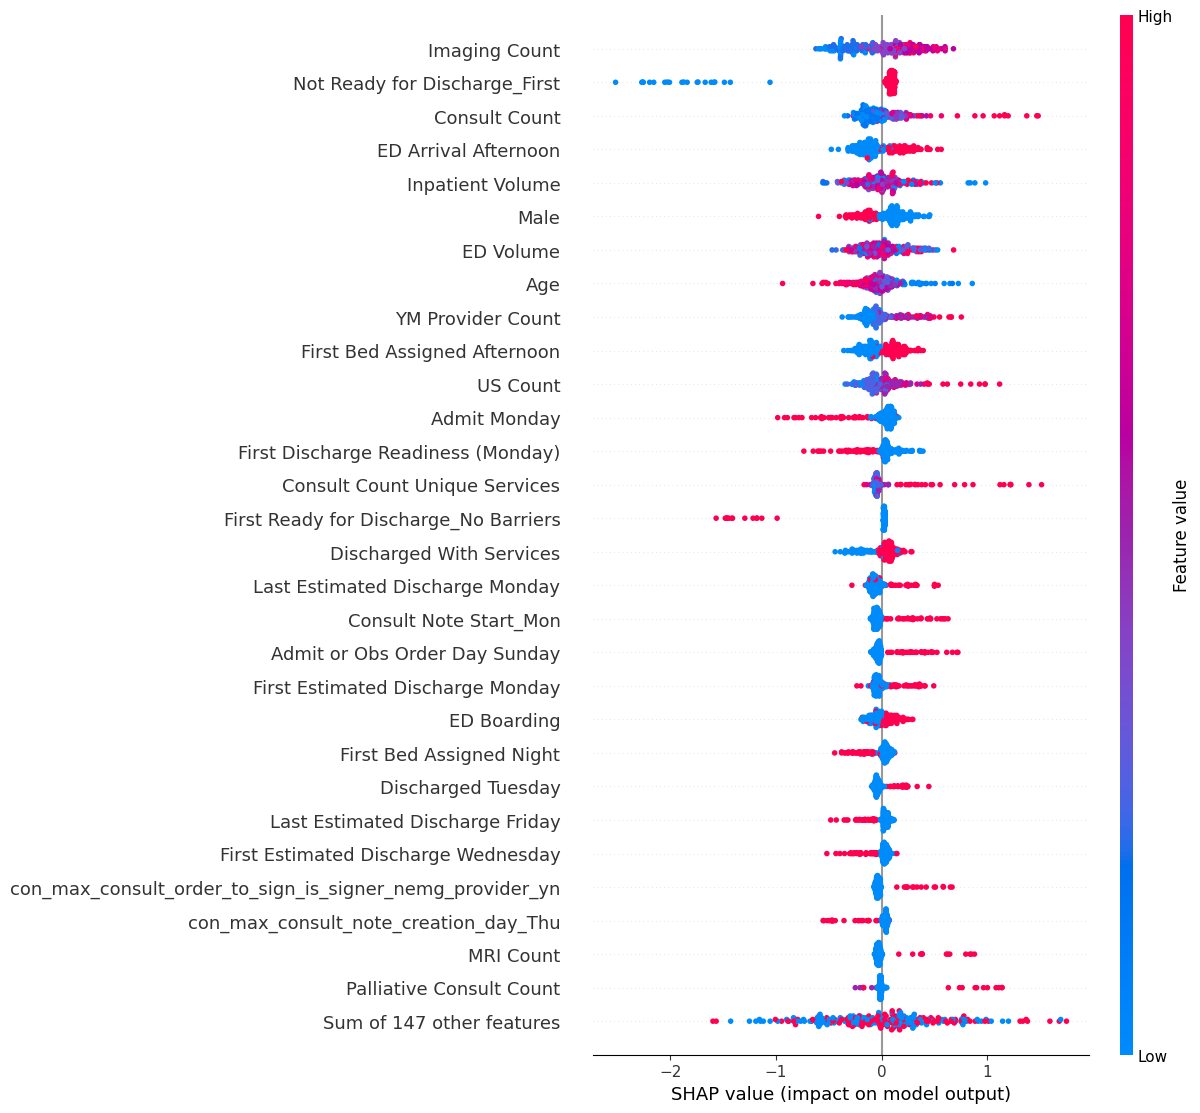

Plots for df_hf_simple_2024-08-02 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output


In [5]:
# Run the function for each data frame and save the plots
for df_name, df_filt in dfs.items():
    print(f"Running on {df_name}")
    run_xgb_and_plot(df_filt, fp_simple, output_folder, df_name, suffix="simple")

### With Quintiles

Running on df_all
df_filt shape: (12771, 911)
X train_preprocessed shape: (10246, 1488)
X val preprocessed shape: (2525, 1488)
y train prolonged LOS proportion: 0.4388053874682803
y val prolonged LOS proportion: 0.4304950495049505
X_train_selected shape: (10246, 617)
X_val_selected shape: (2525, 617)
100%|██████████| 20/20 [00:35<00:00,  1.76s/trial, best loss: -0.7907248949718688]
XGB Best parameters for 617 features: {'colsample_by_tree': 0.6425936901635491, 'learning_rate': 0.13914887471932533, 'max_depth': 14, 'n_estimators': 29, 'num_leaves': 35, 'reg_lambda': 0.8474645439246081}


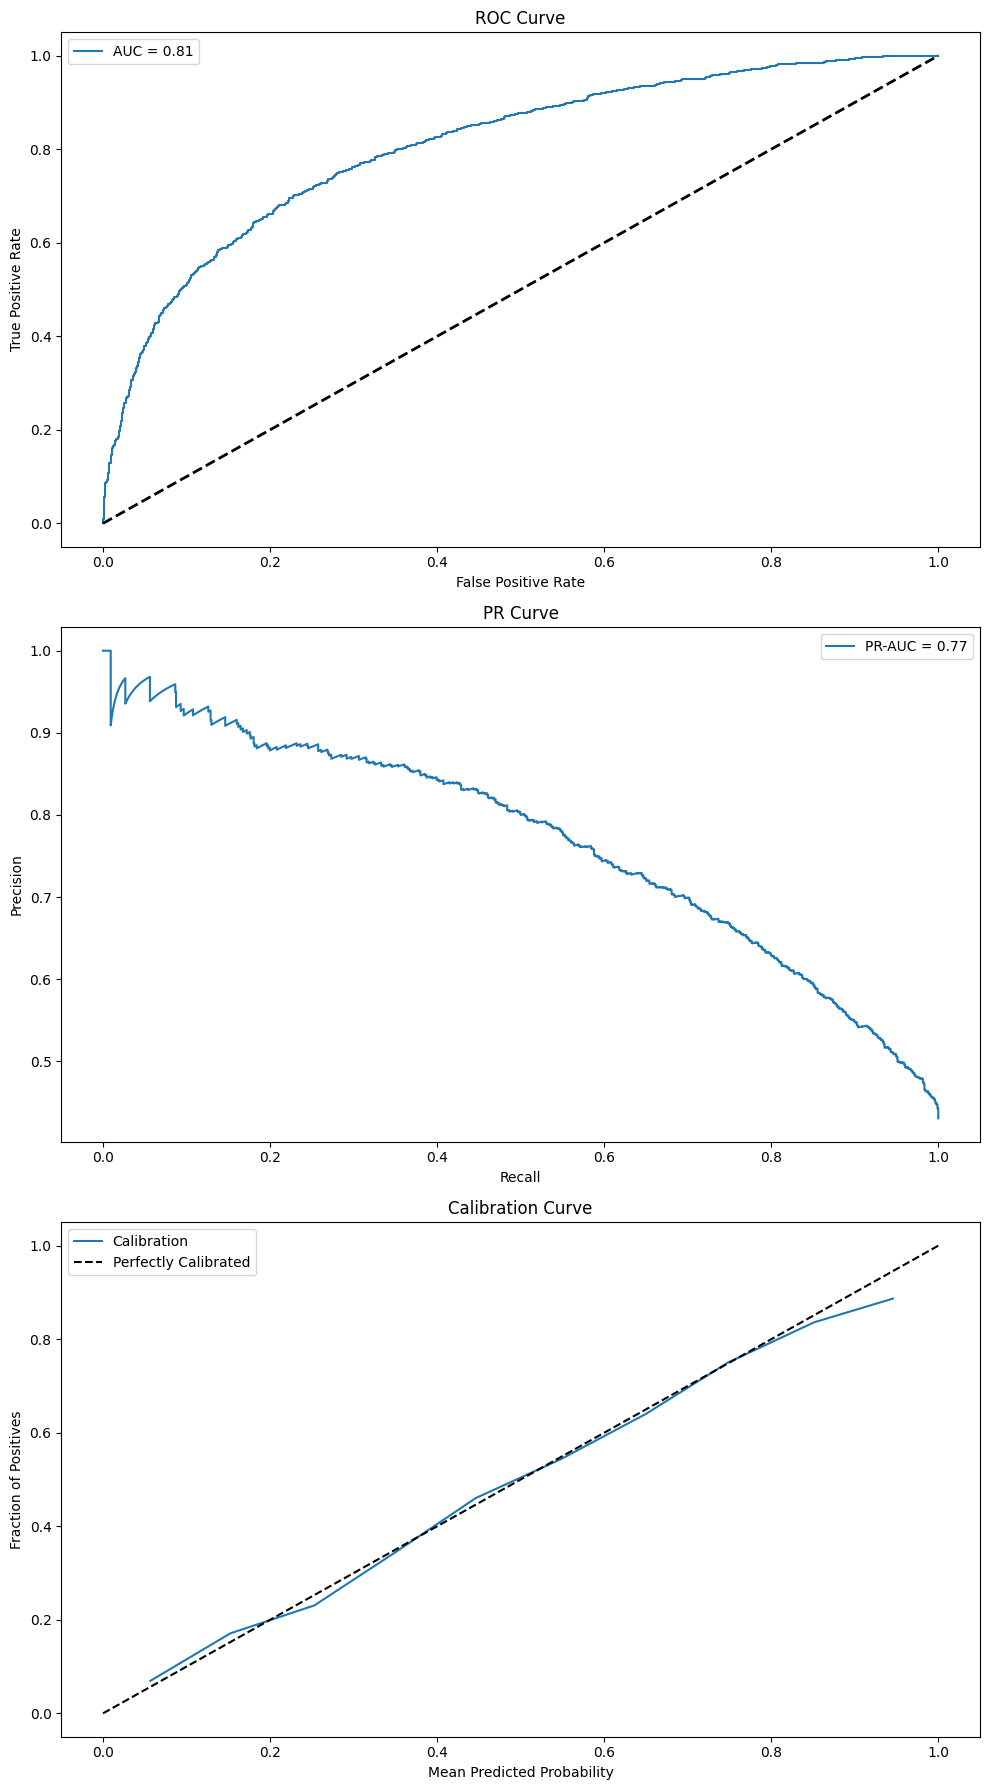

Specificity : 0.8338
Sensitivity : 0.6145
Accuracy : 0.7394
Precision : 0.7365
F1 score : 0.6700
Of 1438 people who did not have a prolonged LOS, 1199 (83.38%) were correctly classified.
Of 1087 people who did have a prolonged LOS, 668 (61.45%) were correctly classified.
img_max_admit_order_to_imaging_order_any_quintile_5.0
summary_first_rfd_status_No
summary_consult_count_all
con_max_admit_order_to_consult_order_any_quintile_5.0
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w mcc
viz_drg_Respiratory infections & inflammations w mcc
viz_right_service_collapsed_yn
img_avg_admit_order_to_imaging_order_any_quintile_5.0
con_avg_admit_order_to_consult_completion_any_quintile_5.0
viz_age
thro_ed_arrival_time_Afternoon
con_avg_admit_order_to_consult_order_any_quintile_5.0
summary_last_rfd_status_No
con_max_admit_order_to_consult_completion_any_quintile_4.0
census_daily_ed_count
viz_service_collapsed_Surgical Services
viz_disp_collapsed_Other
img_max_admit_order_to_imaging_order_any_qui

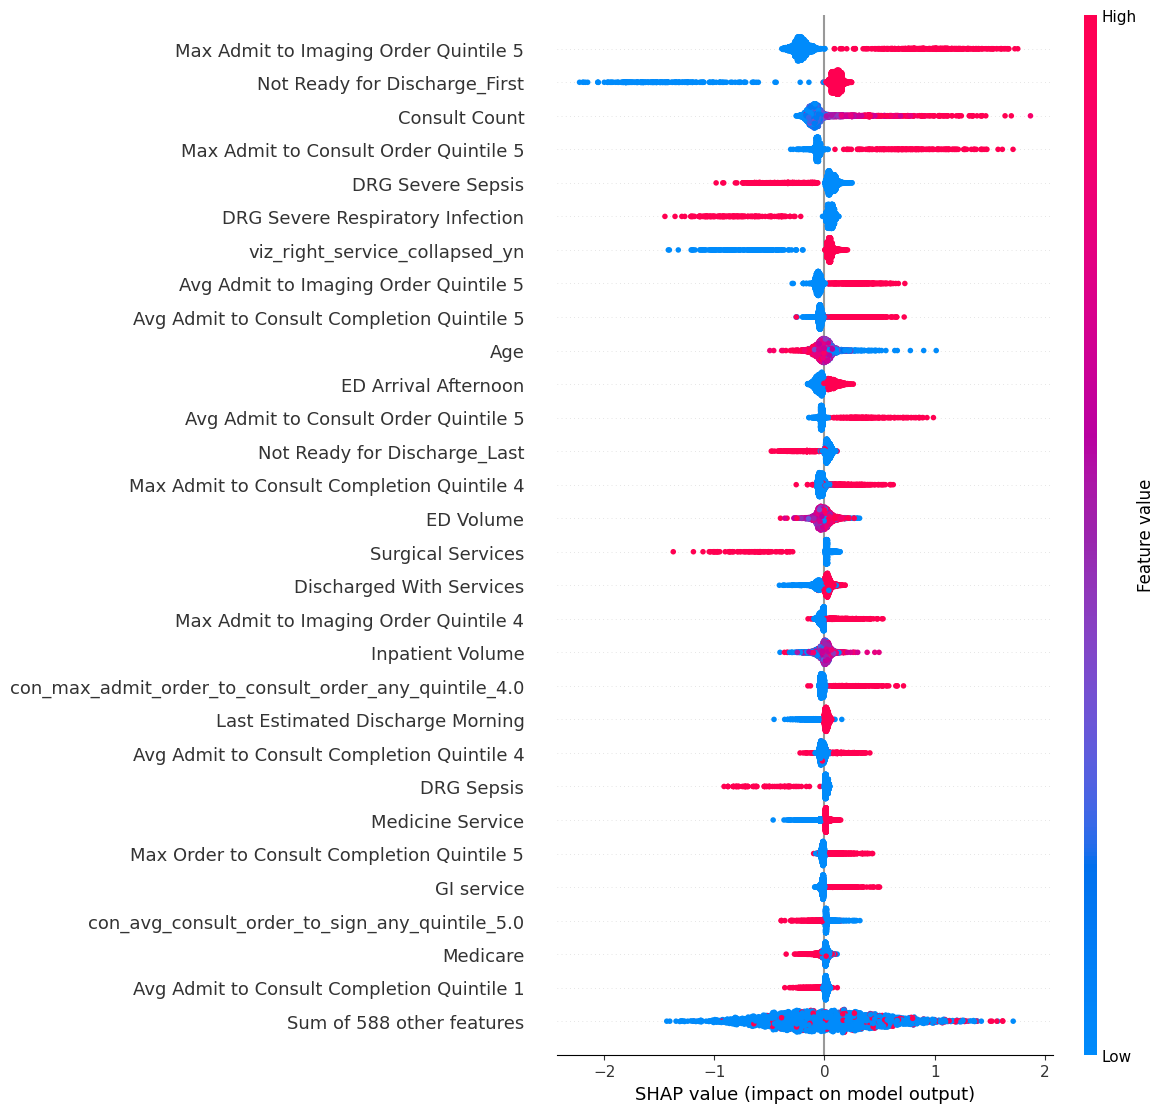

Plots for df_all_with_quintiles_2024-08-02 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output
Running on df_home
df_filt shape: (4749, 911)
X train_preprocessed shape: (3814, 1479)
X val preprocessed shape: (935, 1479)
y train prolonged LOS proportion: 0.3618248557944415
y val prolonged LOS proportion: 0.32192513368983955
X_train_selected shape: (3814, 526)
X_val_selected shape: (935, 526)
100%|██████████| 20/20 [00:20<00:00,  1.01s/trial, best loss: -0.809482426062047] 
XGB Best parameters for 526 features: {'colsample_by_tree': 0.6425936901635491, 'learning_rate': 0.13914887471932533, 'max_depth': 14, 'n_estimators': 29, 'num_leaves': 35, 'reg_lambda': 0.8474645439246081}


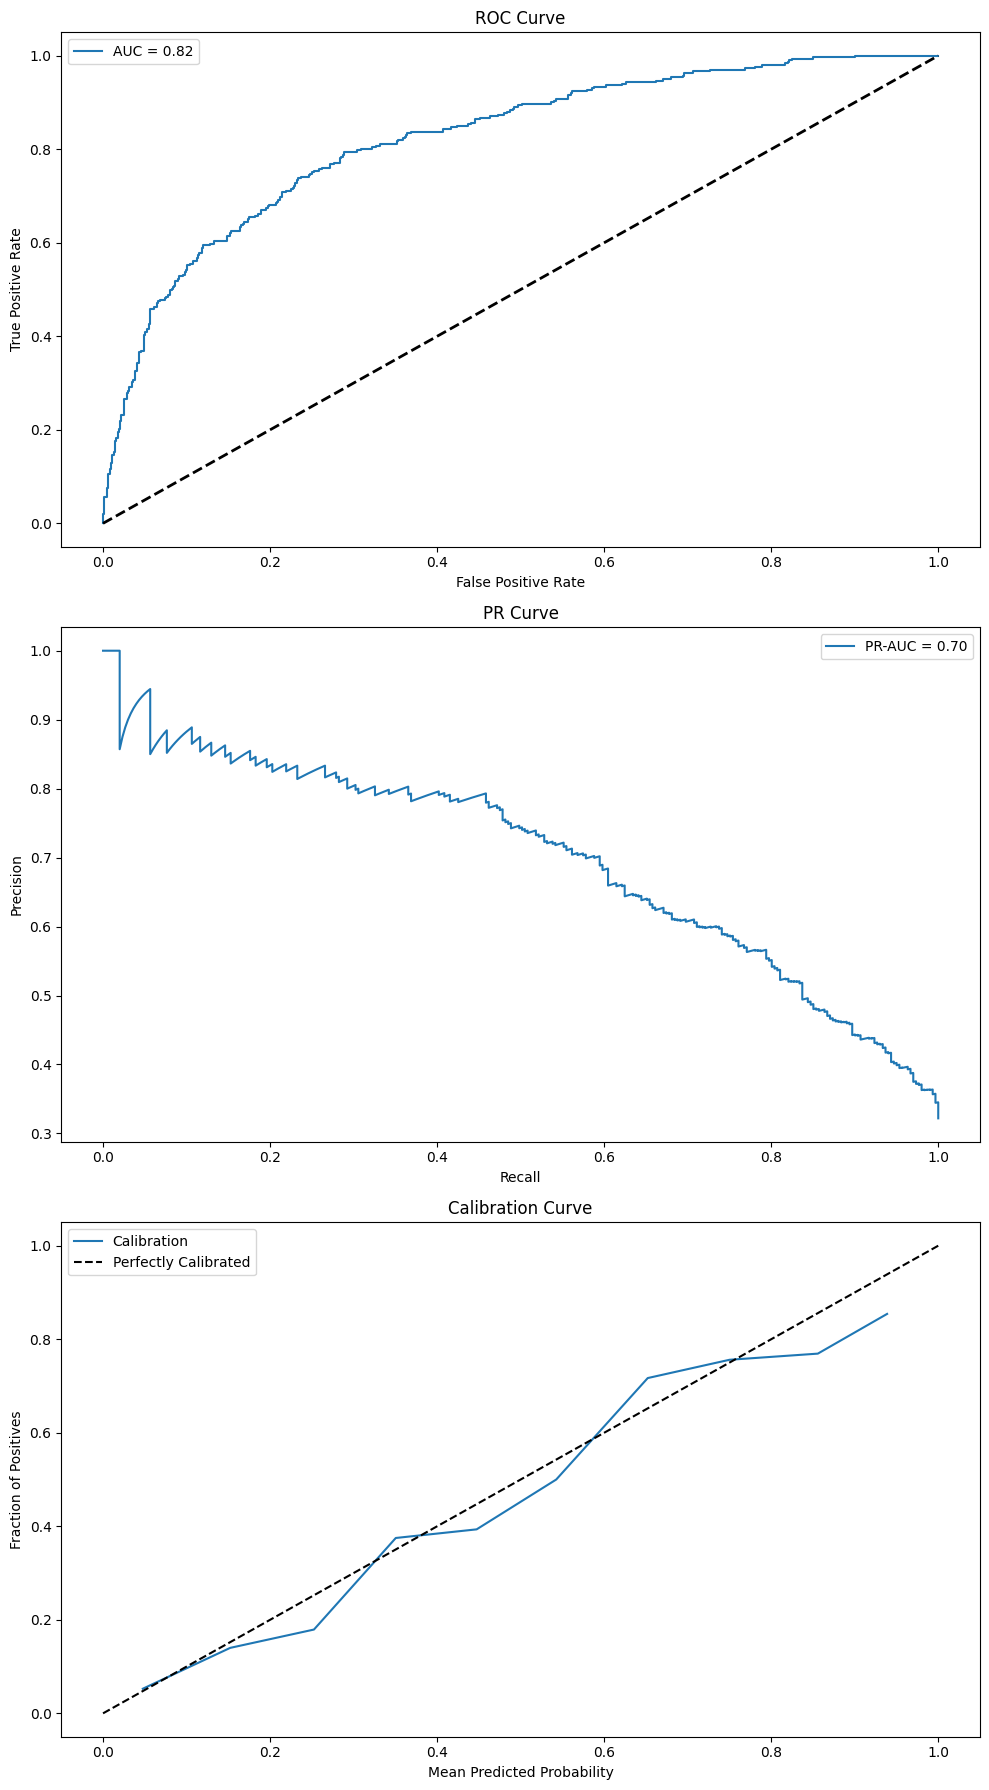

Specificity : 0.8880
Sensitivity : 0.5648
Accuracy : 0.7840
Precision : 0.7054
F1 score : 0.6273
Of 634 people who did not have a prolonged LOS, 563 (88.80%) were correctly classified.
Of 301 people who did have a prolonged LOS, 170 (56.48%) were correctly classified.
summary_first_rfd_status_No
img_max_admit_order_to_imaging_order_any_quintile_5.0
summary_consult_count_all
img_max_admit_order_to_imaging_order_any_quintile_4.0
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w mcc
viz_age
thro_ed_arrival_time_Afternoon
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w/o mcc
viz_drg_Respiratory infections & inflammations w mcc
viz_ynhhs_sg2_service_Digestive Health - Medical
summary_first_edd_doc_day_Mon
summary_last_edd_doc_day_Mon
con_max_admit_order_to_consult_completion_any_quintile_4.0
census_daily_ed_count
census_daily_inpt_count
thro_ed_arrival_time_Night
summary_first_edd_time_Missing
summary_last_rfd_status_No
con_max_admit_order_to_consult_order_any_quintile_4.0
viz_d

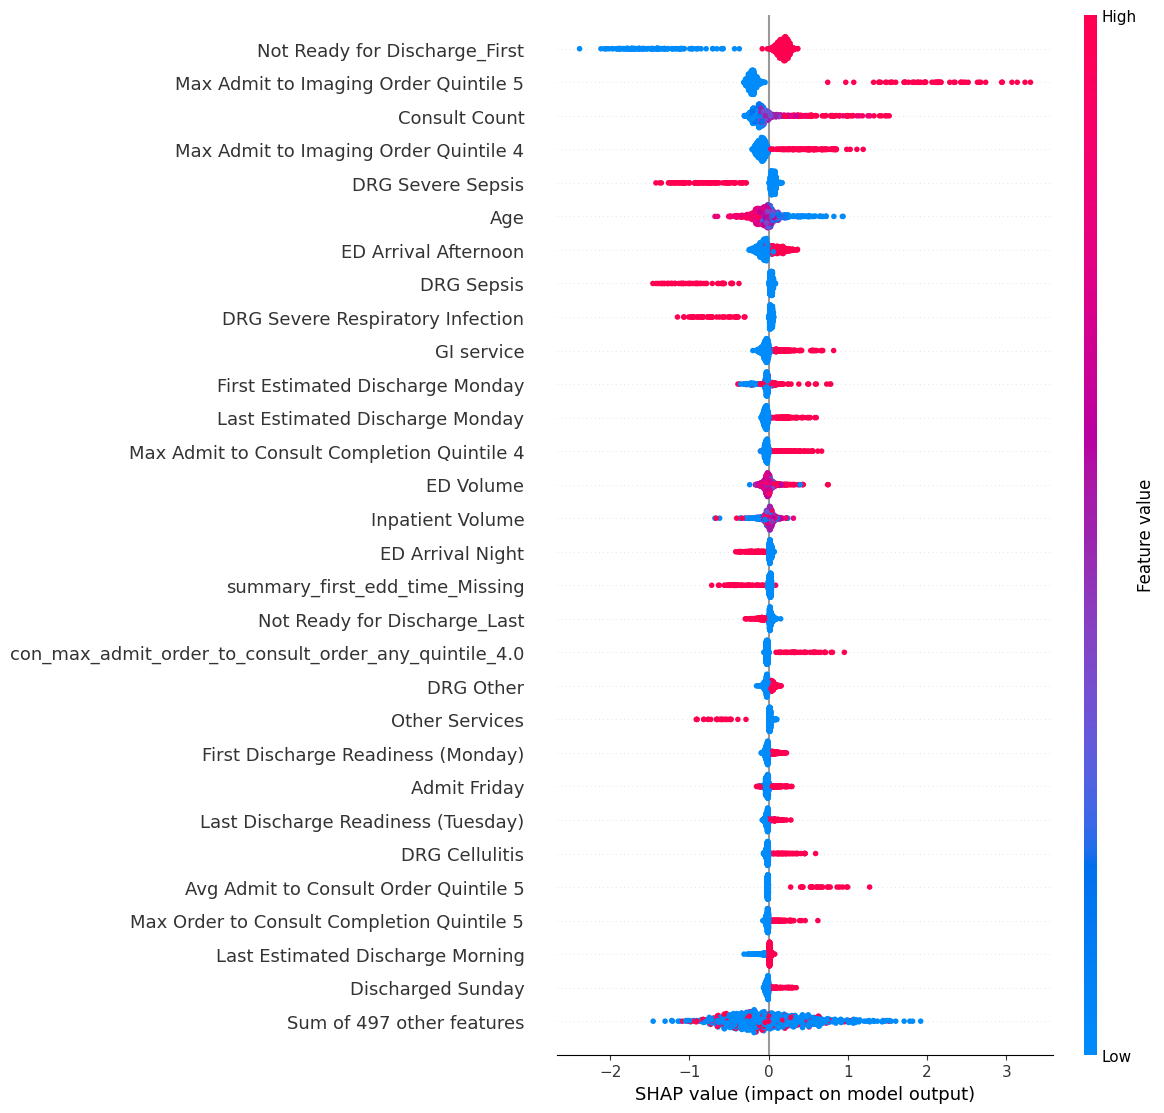

Plots for df_home_with_quintiles_2024-08-02 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output
Running on df_hf
df_filt shape: (1351, 911)
X train_preprocessed shape: (1091, 1519)
X val preprocessed shape: (260, 1519)
y train prolonged LOS proportion: 0.44912923923006415
y val prolonged LOS proportion: 0.4576923076923077
X_train_selected shape: (1091, 459)
X_val_selected shape: (260, 459)
100%|██████████| 20/20 [00:12<00:00,  1.55trial/s, best loss: -0.7469498791252038]
XGB Best parameters for 459 features: {'colsample_by_tree': 0.8965962960767944, 'learning_rate': 0.13728833715376815, 'max_depth': 9, 'n_estimators': 13, 'num_leaves': 48, 'reg_lambda': 0.8271158422569497}


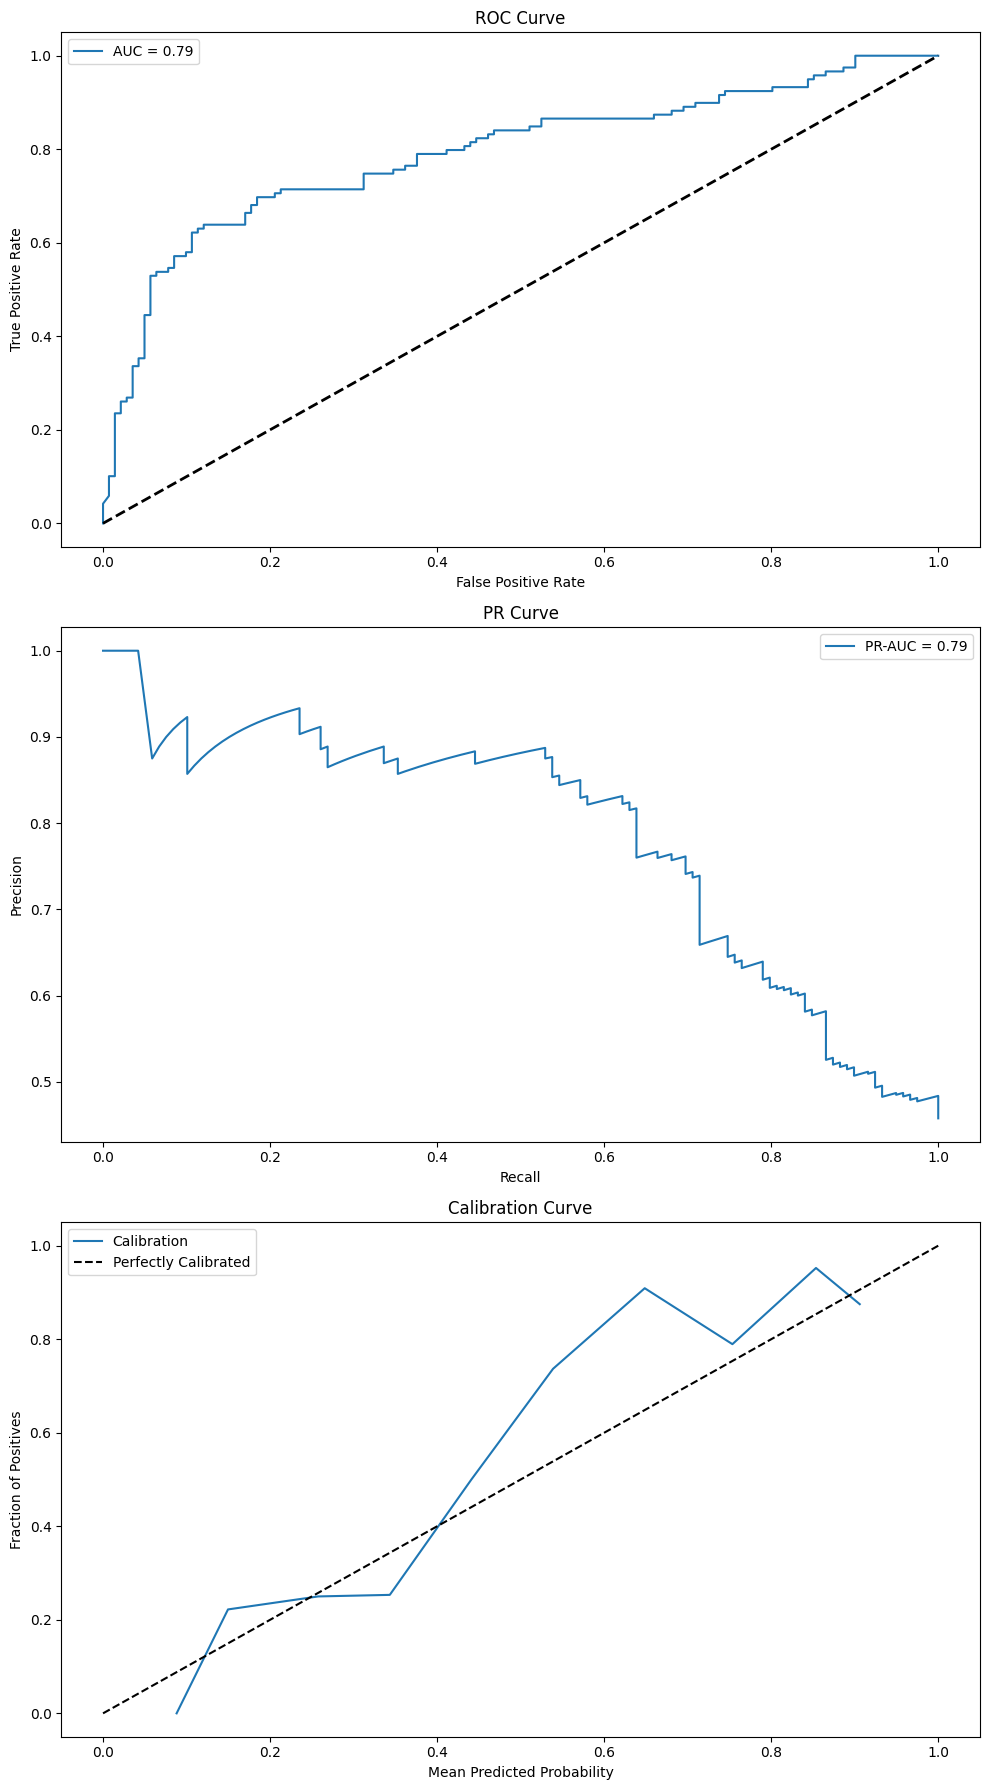

Specificity : 0.9149
Sensitivity : 0.5546
Accuracy : 0.7500
Precision : 0.8462
F1 score : 0.6701
Of 141 people who did not have a prolonged LOS, 129 (91.49%) were correctly classified.
Of 119 people who did have a prolonged LOS, 66 (55.46%) were correctly classified.
img_max_admit_order_to_imaging_order_any_quintile_5.0
con_avg_admit_order_to_consult_order_any_quintile_5.0
summary_first_rfd_status_No
con_avg_admit_order_to_consult_order_any_quintile_4.0
thro_ed_arrival_time_Afternoon
viz_age
census_daily_ed_count
img_max_order_to_completion_any_quintile_5.0
con_avg_admit_order_to_consult_completion_cardiology_quintile_1.0
img_avg_admit_order_to_imaging_order_any_quintile_5.0
summary_last_rfd_status_No
viz_discharged_day_Tue
con_max_consult_order_to_sign_cardiology_quintile_2.0
summary_first_rfd_status_Yes, no barriers
summary_last_edd_doc_day_Mon
summary_first_rfd_day_Mon
summary_consult_count_all
thro_admit_or_obs_order_day_Sun
census_daily_inpt_count
img_count_us
viz_gender_Male
con_

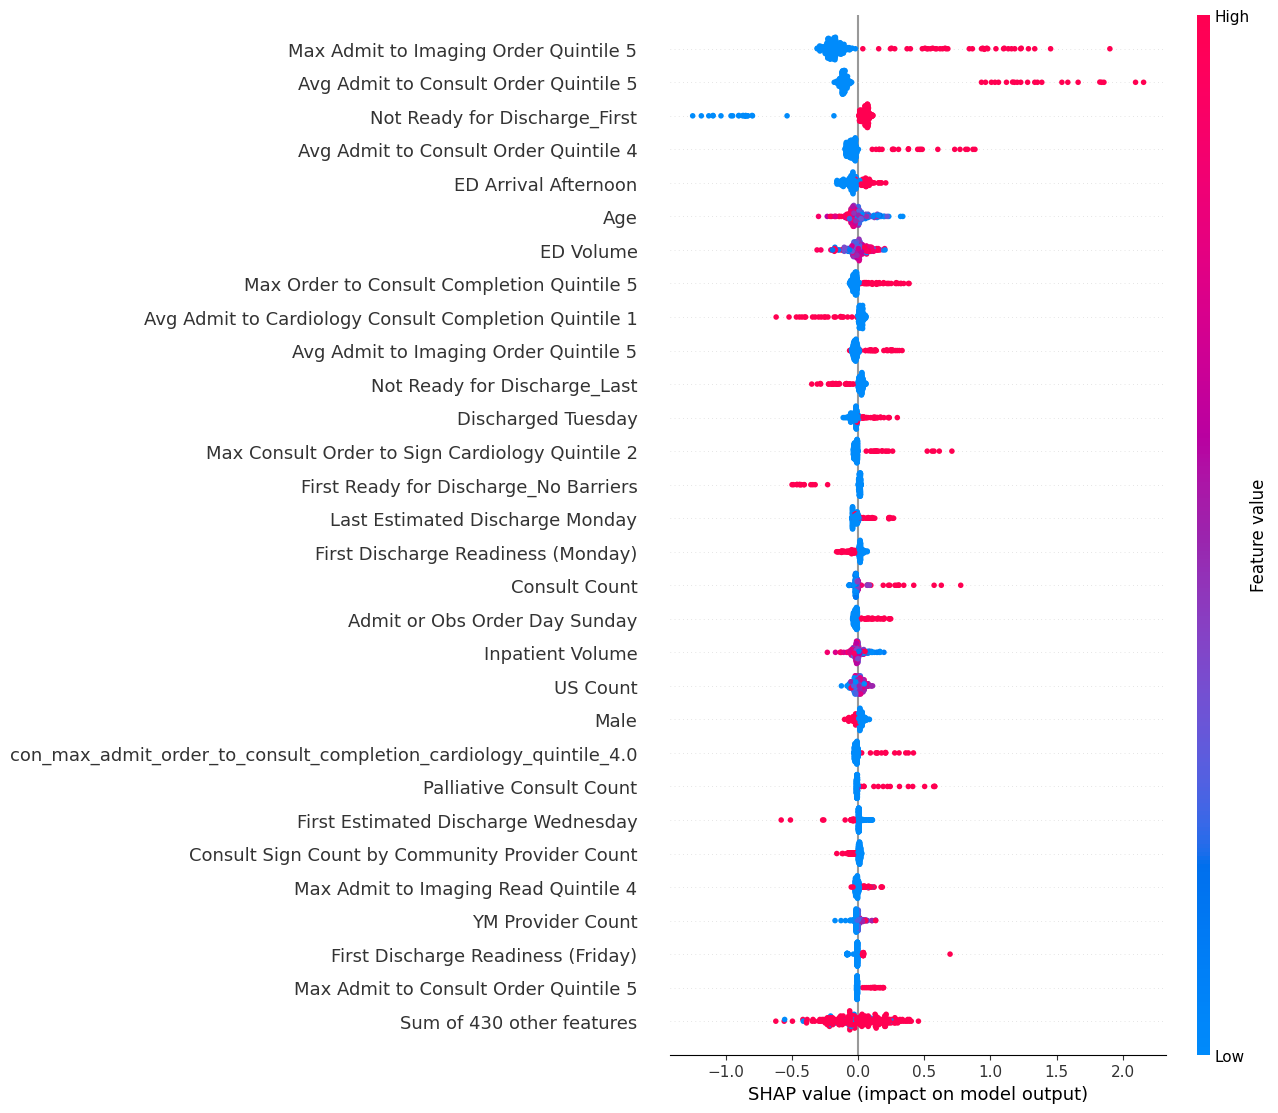

Plots for df_hf_with_quintiles_2024-08-02 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output


In [6]:
# Run the function for each data frame and save the plots
for df_name, df_filt in dfs.items():
    print(f"Running on {df_name}")
    run_xgb_and_plot(df_filt, fp_complex, output_folder, df_name, suffix="with_quintiles")